## The Battle of the Neighborhoods - Week 2

### Part 2 Explore New York city and its Boroughs Cuisine dataset

In [8]:
# Import all required packages
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from PIL import Image # converting images into arrays
import requests

from bs4 import BeautifulSoup # package for parsing HTML and XML documents

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# install wordcloud
# !conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is already installed')

Matplotlib version:  3.0.2
Wordcloud is already installed


This data is extracted from the wikipedia Page - https://en.wikipedia.org/wiki/Cuisine_of_New_York_City

In [107]:
website_url = requests.get('https://en.wikipedia.org/wiki/Cuisine_of_New_York_City').text
soup = BeautifulSoup(website_url,'html.parser')
# print(soup.prettify())

regex = re.compile('toc-1')
content_lis = soup.find_all('div', attrs={'class': 'div-col'})
# print(content_lis)


In [69]:
tb = soup.find('div', class_='div-col')
tb

<div class="div-col columns column-width" style="-moz-column-width: 30em; -webkit-column-width: 30em; column-width: 30em;">
<ul><li><a href="/wiki/Bedford_Park,_Bronx" title="Bedford Park, Bronx">Bedford Park</a> – Mexican, Puerto Rican, Dominican, Korean (on 204th St.)</li>
<li><a href="/wiki/Belmont,_Bronx" title="Belmont, Bronx">Belmont</a> – Italian, Albanian (also known as "Arthur Avenue," "Little Italy")</li>
<li><a href="/wiki/City_Island,_Bronx" title="City Island, Bronx">City Island</a> – Italian, Seafood</li>
<li><a href="/wiki/Morris_Park,_Bronx" title="Morris Park, Bronx">Morris Park</a> – Italian, Albanian</li>
<li><a href="/wiki/Norwood,_Bronx" title="Norwood, Bronx">Norwood</a> – Filipino (formerly Irish, less so today)</li>
<li><a href="/wiki/Riverdale,_Bronx" title="Riverdale, Bronx">Riverdale</a> – Jewish</li>
<li><a href="/wiki/South_Bronx" title="South Bronx">South Bronx</a> – Puerto Rican, Dominican</li>
<li><a href="/wiki/Wakefield,_Bronx" title="Wakefield, Bronx"

In [71]:
# Identifying cusines in Bronx, likewise others too
for link in tb.find_all():
    cuisine = link.get_text()
    print(cuisine)
    break

Bedford Park – Mexican, Puerto Rican, Dominican, Korean (on 204th St.)
Belmont – Italian, Albanian (also known as "Arthur Avenue," "Little Italy")
City Island – Italian, Seafood
Morris Park – Italian, Albanian
Norwood – Filipino (formerly Irish, less so today)
Riverdale – Jewish
South Bronx – Puerto Rican, Dominican
Wakefield – Jamaican, West Indian
Woodlawn – Irish


In [73]:
import pandas as pd
NYC_CUISINE=pd.read_excel('NYC_CUISINE.xlsx')
NYC_CUISINE.head()

,Borough,Neighborhood,Cuisine
0,The Bronx,Bedford Park,"Mexican, Puerto Rican, Dominican, Korean (on ..."
1,The Bronx,Belmont,"Italian, Albanian (also known as ""Arthur Aven..."
2,The Bronx,City Island,"Italian, Seafood"
3,The Bronx,Morris Park,"Italian, Albanian"
4,The Bronx,Norwood,"Filipino (formerly Irish, less so today)"


In [77]:
print(NYC_CUISINE.Borough.unique())
NYC_CUISINE.shape

['The Bronx' 'Queens' 'Brooklyn' 'Staten Island' 'Manhattan']


(56, 3)

In [78]:
NYC_CUISINE['Borough'].value_counts()

Brooklyn         19
Queens           13
Manhattan        12
The Bronx         9
Staten Island     3
Name: Borough, dtype: int64

### NEW YORK CITY CUISINE - WORD CLOUD

In [79]:
NYC_CUISINE[['Cuisine']].to_csv('CUISINE_WC.txt', sep=',', index=False)

In [80]:
CUISINE_WC1 = open('CUISINE_WC.txt', 'r').read()

In [81]:
# Use the stopwords that we imported from `word_cloud`. We use the function *set* to remove any redundant stopwords.
stopwords = set(STOPWORDS)

In [82]:
# instantiate a word cloud object
NYC_CUISINE_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
NYC_CUISINE_WC.generate(CUISINE_WC1)

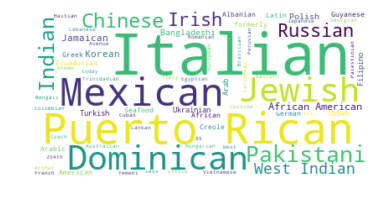

<Figure size 2160x3240 with 0 Axes>

In [83]:
# The word cloud is created, let's visualize it.
# display the word cloud
plt.imshow(NYC_CUISINE_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

### CUISINE's WORD CLOUD BY BOROUGH

In [84]:
NYC_CUISINE[NYC_CUISINE['Borough'] == 'Brooklyn']['Cuisine'].to_csv('BR_CUISINE.txt', sep=',', index=False)

In [85]:
BR_CUISINE_WC = open('BR_CUISINE.txt', 'r').read()

Borough: The Bronx


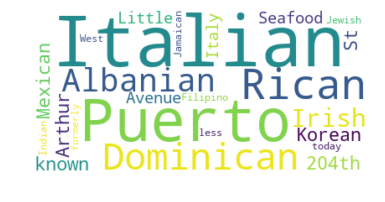

<Figure size 2160x3240 with 0 Axes>

Borough: Queens


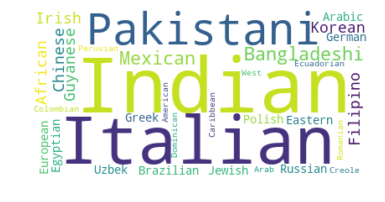

<Figure size 2160x3240 with 0 Axes>

Borough: Brooklyn


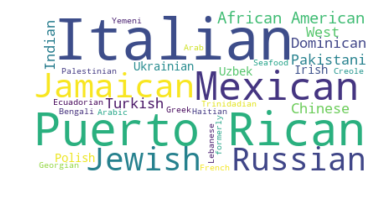

<Figure size 2160x3240 with 0 Axes>

Borough: Staten Island


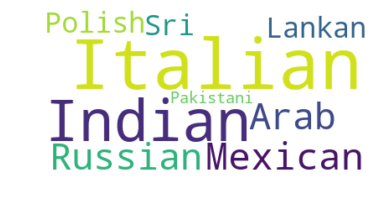

<Figure size 2160x3240 with 0 Axes>

Borough: Manhattan


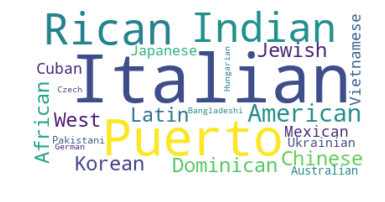

<Figure size 2160x3240 with 0 Axes>

In [104]:
for i in NYC_CUISINE['Borough'].unique():
    print("Borough:", i)
    NYC_CUISINE[NYC_CUISINE['Borough'] == i]['Cuisine'].to_csv('CUISINE.txt', sep=',', index=False)
    CUISINE_WC = open('CUISINE.txt', 'r').read()
    # Use the stopwords that we imported from `word_cloud`. We use the function *set* to remove any redundant stopwords.
    stopwords = set(STOPWORDS)

    # instantiate a word cloud object
    CUISINE_NYC = WordCloud(
        background_color='white',
        max_words=2000,
        stopwords=stopwords
    )

    # generate the word cloud
    CUISINE_NYC.generate(CUISINE_WC)
    
    # display the word cloud
    plt.imshow(CUISINE_NYC, interpolation='bilinear')
    plt.axis('off')

    fig = plt.figure()
    fig.set_figwidth(30)
    fig.set_figheight(45)

    plt.show()

Each borough representing the most number of cusinies. All the Borough's have Italian as the most largest cuisine. 

## Farmers Market

In [112]:
#The dataset is freely available from https://data.cityofnewyork.us/dataset/DOHMH-Farmers-Markets-and-Food-Boxes/8vwk-6iz2
# Read the CSV data file from the object storage into a pandas DataFrame
FM_NYC=pd.read_csv("DOHMH_Farmers_Markets.csv")
print(FM_NYC.shape)
FM_NYC.head()

(139, 13)


,Borough,Market Name,Street Address,Latitude,Longitude,Days of Operation,Hours of Operations,Season Dates,Accepts EBT,Open Year-Round,Stellar Cooking Demonstrations,Food Activities for Kids,Location Point
0,Bronx,170 Farm Stand,E 170th St & Townsend Ave,40.839882,-73.916783,Wednesday,2:30 - 6:30 p.m.,07/10/2019-11/27/2019,Yes,No,No,Yes,"(40.839882, -73.916783)"
1,Bronx,Bissel Gardens Farmers Market,Baychester Ave & E 241st St,40.901520,-73.846937,Wednesday & Saturday,9 a.m. - 5 p.m.,07/06/2019-11/27/2019,No,No,No,No,"(40.90152, -73.846937)"
2,Bronx,Bronx Borough Hall Greenmarket,Grand Concourse bet E 161st & 162nd Sts,40.826835,-73.922621,Tuesday,8 a.m. - 4 p.m.,06/04/19-11/26/19,Yes,No,Yes,No,"(40.826835, -73.922621)"
3,Bronx,Bronx Family Center Go!Healthy Farm Stand,1515 Southern Blvd,40.833734,-73.889934,Thursday,9:30 a.m. - 3:30 p.m.,07/11/2019-11/21/2019,Yes,No,No,Yes,"(40.833734, -73.889934)"
4,Bronx,BronxWorks Farm Stand,1130 Grand Concourse,40.832331,-73.919590,Thursday,10 a.m. -4 p.m.,07/08/2019-11/22/2019,Yes,No,No,No,"(40.832331, -73.91959)"


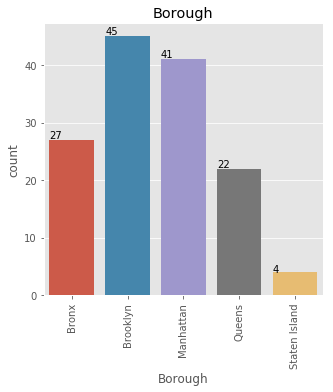

In [114]:
import seaborn as sns

fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Borough',data=FM_NYC)
ax.set_title("Borough")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

Brooklyn and Manhattan has highest number of Farmer's Market.

In [119]:
# Getting latitude and longitude values of New York City using geopy library.

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [120]:
# Map of New York with Facility name and Borough of Farmers Market superimposed on top.
import folium # map rendering library

# create map of New York City using latitude and longitude values
map_markets = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, FacilityName, borough in zip(FM_NYC['Latitude'], FM_NYC['Longitude'], FM_NYC['Market Name'], FM_NYC['Borough']):
            label = '{}, {}'.format(FacilityName, borough)
            label = folium.Popup(label, parse_html=True)
            folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='green',
                fill=True,
                fill_color='green',
                fill_opacity=0.7,
                parse_html = False).add_to(map_markets)  

map_markets